# Reglas de asociación -  Búsqueda de patrones
* Preparación: num-> cat (Discretización)
* Aprendizaje: apriori
* Evaluación: soporte y confianza
* Interpretación

In [1]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [2]:
data=pd.read_excel('Empleados.xlsx', sheet_name=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sueldo         270 non-null    int64 
 1   Casado         270 non-null    object
 2   Carro          270 non-null    object
 3   Hijos          270 non-null    int64 
 4   Casa           270 non-null    object
 5   Sindicato      270 non-null    object
 6   Incapacidades  270 non-null    int64 
 7   Antiguedad     270 non-null    int64 
 8   Sexo           270 non-null    object
dtypes: int64(4), object(5)
memory usage: 19.1+ KB


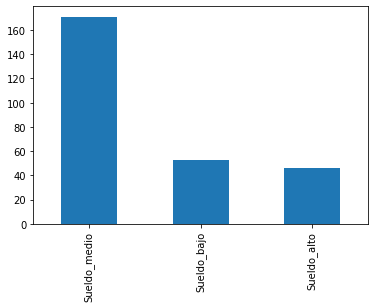

In [3]:
# Discretización: Cut
 
#Se indica la cantidad de rangos
data['Sueldo'] = pd.cut(data['Sueldo'] , bins=3,labels=['Sueldo_bajo','Sueldo_medio','Sueldo_alto']) 
data['Sueldo'].value_counts().plot(kind='bar')

In [4]:
# Discretización: Cut
data['Incapacidades'] = pd.cut(data['Incapacidades'] , bins=2, labels=['Pocas_incapacidades','Muchas_incapacidades']) 
data

,Sueldo,Casado,Carro,Hijos,Casa,Sindicato,Incapacidades,Antiguedad,Sexo
0,Sueldo_bajo,Sí,No,0,Alquiler,No,Pocas_incapacidades,15,H
1,Sueldo_medio,No,Sí,1,Alquiler,Sí,Pocas_incapacidades,3,M
2,Sueldo_medio,Sí,Sí,2,Prop,Sí,Pocas_incapacidades,10,H
3,Sueldo_alto,Sí,Sí,1,Alquiler,No,Muchas_incapacidades,7,M
4,Sueldo_bajo,Sí,Sí,0,Prop,Sí,Pocas_incapacidades,6,H
...,...,...,...,...,...,...,...,...,...
265,Sueldo_medio,No,No,0,Alquiler,No,Pocas_incapacidades,12,M
266,Sueldo_medio,Sí,Sí,2,Prop,No,Pocas_incapacidades,1,H
267,Sueldo_medio,No,No,0,Alquiler,No,Muchas_incapacidades,5,M
268,Sueldo_medio,No,Sí,0,Alquiler,Sí,Pocas_incapacidades,7,H


In [5]:
# Discretización: Cut
#Bins= (no incluye, si incluye]
#Yo indico los límites de los rangos: (-1-0), (1-10)
data['Hijos'] = pd.cut(data['Hijos'] , bins=[-1,0,10], labels=['No_hijos','Si_hijos']) 
data

,Sueldo,Casado,Carro,Hijos,Casa,Sindicato,Incapacidades,Antiguedad,Sexo
0,Sueldo_bajo,Sí,No,No_hijos,Alquiler,No,Pocas_incapacidades,15,H
1,Sueldo_medio,No,Sí,Si_hijos,Alquiler,Sí,Pocas_incapacidades,3,M
2,Sueldo_medio,Sí,Sí,Si_hijos,Prop,Sí,Pocas_incapacidades,10,H
3,Sueldo_alto,Sí,Sí,Si_hijos,Alquiler,No,Muchas_incapacidades,7,M
4,Sueldo_bajo,Sí,Sí,No_hijos,Prop,Sí,Pocas_incapacidades,6,H
...,...,...,...,...,...,...,...,...,...
265,Sueldo_medio,No,No,No_hijos,Alquiler,No,Pocas_incapacidades,12,M
266,Sueldo_medio,Sí,Sí,Si_hijos,Prop,No,Pocas_incapacidades,1,H
267,Sueldo_medio,No,No,No_hijos,Alquiler,No,Muchas_incapacidades,5,M
268,Sueldo_medio,No,Sí,No_hijos,Alquiler,Sí,Pocas_incapacidades,7,H


In [6]:
# Discretización: Cut
#Bins= (no incluye, si incluye]
 
#Yo indico los límites de los rangos
#Rangos: (-1-3),(4-40) 
data['Antiguedad'] = pd.cut(data['Antiguedad'] , bins=[-1,3,40],labels=['Antiguedad_baja', 'Antiguedad_alta']) 
data.head()

,Sueldo,Casado,Carro,Hijos,Casa,Sindicato,Incapacidades,Antiguedad,Sexo
0,Sueldo_bajo,Sí,No,No_hijos,Alquiler,No,Pocas_incapacidades,Antiguedad_alta,H
1,Sueldo_medio,No,Sí,Si_hijos,Alquiler,Sí,Pocas_incapacidades,Antiguedad_baja,M
2,Sueldo_medio,Sí,Sí,Si_hijos,Prop,Sí,Pocas_incapacidades,Antiguedad_alta,H
3,Sueldo_alto,Sí,Sí,Si_hijos,Alquiler,No,Muchas_incapacidades,Antiguedad_alta,M
4,Sueldo_bajo,Sí,Sí,No_hijos,Prop,Sí,Pocas_incapacidades,Antiguedad_alta,H


In [7]:
#Para mejorar la interpretación mejoramos los nombres de las categorías
data["Casado"]=data["Casado"].replace({'Sí': 'Casado', 'No':'Soltero'})
data["Carro"]=data["Carro"].replace({'Sí': 'Tiene_carro', 'No':'No_tieneCarro'})
data["Sindicato"]=data["Sindicato"].replace({'Sí': 'Si_Sindicato', 'No':'No_Sindicato'})
data.head()

,Sueldo,Casado,Carro,Hijos,Casa,Sindicato,Incapacidades,Antiguedad,Sexo
0,Sueldo_bajo,Casado,No_tieneCarro,No_hijos,Alquiler,No_Sindicato,Pocas_incapacidades,Antiguedad_alta,H
1,Sueldo_medio,Soltero,Tiene_carro,Si_hijos,Alquiler,Si_Sindicato,Pocas_incapacidades,Antiguedad_baja,M
2,Sueldo_medio,Casado,Tiene_carro,Si_hijos,Prop,Si_Sindicato,Pocas_incapacidades,Antiguedad_alta,H
3,Sueldo_alto,Casado,Tiene_carro,Si_hijos,Alquiler,No_Sindicato,Muchas_incapacidades,Antiguedad_alta,M
4,Sueldo_bajo,Casado,Tiene_carro,No_hijos,Prop,Si_Sindicato,Pocas_incapacidades,Antiguedad_alta,H


2. Apredizaje

Para apriori deben ser categoricas

In [8]:
#Debemos instalar el paquete para el algoritmo apriori
!pip install -q apyori

In [9]:
from apyori import apriori
#Soporte: datos(precedente,Consecuente)/total_datos
#Confianza: datos(precedente,Consecuente)/datos_precedente
reglas=apriori(data.values, min_support=0.50, min_confidence=0.8)
reglas=list(reglas)
reglas

[RelationRecord(items=frozenset({'Antiguedad_alta'}), support=0.8, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Antiguedad_alta'}), confidence=0.8, lift=1.0)]),
 RelationRecord(items=frozenset({'Pocas_incapacidades'}), support=0.8666666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pocas_incapacidades'}), confidence=0.8666666666666667, lift=1.0)]),
 RelationRecord(items=frozenset({'No_hijos', 'Antiguedad_alta'}), support=0.5333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'No_hijos'}), items_add=frozenset({'Antiguedad_alta'}), confidence=0.888888888888889, lift=1.1111111111111112)]),
 RelationRecord(items=frozenset({'Pocas_incapacidades', 'Antiguedad_alta'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Antiguedad_alta'}), items_add=frozenset({'Pocas_incapacidades'}), confidence=0.8333333333333333, lift=0.9615384615384615)]),
 Relati

In [10]:
reglas = pd.DataFrame(reglas)
reglas

,items,support,ordered_statistics
0,(Antiguedad_alta),0.800000,"[((), (Antiguedad_alta), 0.8, 1.0)]"
1,(Pocas_incapacidades),0.866667,"[((), (Pocas_incapacidades), 0.866666666666666..."
2,"(No_hijos, Antiguedad_alta)",0.533333,"[((No_hijos), (Antiguedad_alta), 0.88888888888..."
3,"(Pocas_incapacidades, Antiguedad_alta)",0.666667,"[((Antiguedad_alta), (Pocas_incapacidades), 0...."
4,"(Sueldo_medio, Antiguedad_alta)",0.522222,"[((Sueldo_medio), (Antiguedad_alta), 0.8245614..."
5,"(H, Pocas_incapacidades)",0.600000,"[((H), (Pocas_incapacidades), 1.0, 1.153846153..."
6,"(No_hijos, Pocas_incapacidades)",0.533333,"[((No_hijos), (Pocas_incapacidades), 0.8888888..."
7,"(Pocas_incapacidades, Sueldo_medio)",0.540741,"[((Sueldo_medio), (Pocas_incapacidades), 0.853..."
8,"(Tiene_carro, Pocas_incapacidades)",0.666667,"[((Tiene_carro), (Pocas_incapacidades), 0.9090..."


In [11]:
reglas.to_excel('./reglas de asociacion Empleados.xlsx')